# Q1
Delivery_time -> Predict delivery time using sorting time 

In [153]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
import numpy as np
from sklearn.metrics import r2_score
import statsmodels.formula.api as smf

In [30]:
df = pd.read_csv("delivery_time.csv")
df.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


Text(0, 0.5, 'Delivery Time')

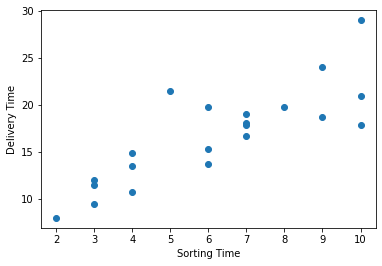

In [31]:
plt.scatter(df.iloc[:,1],df.iloc[:,0])
plt.xlabel("Sorting Time")
plt.ylabel("Delivery Time")

In [32]:
df.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


From both scatter plot and correlation metric, we see that there is a postive corraltion between delivery time and sorting time

In [33]:
lm = linear_model.LinearRegression()

In [93]:
X= df["Sorting Time"].values.reshape(df["Sorting Time"].count(),1)
Y = df["Delivery Time"].values.reshape(df["Delivery Time"].count(),1)
linReg = lm.fit(X,Y)

In [94]:
alpha_val= linReg.coef_
beta_val = linReg.intercept_
alpha_val,beta_val

(array([[1.6490199]]), array([6.58273397]))

Text(0, 0.5, 'Delivery Time')

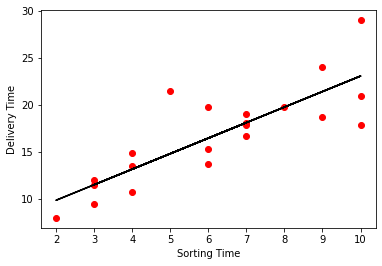

In [95]:
plt.scatter(df.iloc[:,1],df.iloc[:,0],color="red")
plt.plot(df.iloc[:,1],(alpha_val[0]*df.iloc[:,1])+beta_val,color="black")
plt.xlabel("Sorting Time")
plt.ylabel("Delivery Time")

In [168]:
np.round(r2_score(Y,linReg.predict(X)),4)

0.6823

# EDA to improve R^2 result

In [147]:
df=df.rename(mapper= {"Sorting Time":"Sorting_Time"},axis=1)
df=df.rename(mapper= {"Delivery Time":"Delivery_Time"},axis=1)
df.head()

,Delivery_Time,Sorting_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


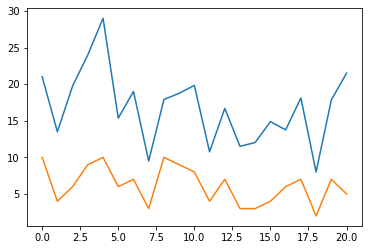

In [207]:
plt.plot(df.iloc[:,0])
plt.plot(df.iloc[:,1])

In [169]:
model1 = smf.ols("np.log(Sorting_Time)~Delivery_Time",data=df).fit()

In [186]:
print("beta value:",round(model1.params[0],4))
print("alpha value:",round(model1.params[1],4))

beta value: 0.4372
alpha value: 0.0769


In [171]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     np.log(Sorting_Time)   R-squared:                       0.695
Model:                              OLS   Adj. R-squared:                  0.679
Method:                   Least Squares   F-statistic:                     43.39
Date:                  Fri, 03 Sep 2021   Prob (F-statistic):           2.64e-06
Time:                          12:56:46   Log-Likelihood:               -0.85600
No. Observations:                    21   AIC:                             5.712
Df Residuals:                        19   BIC:                             7.801
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.4372      0.204      2.139      0.046       0.009       0.865
Delivery_Time     0.0769      0.012      6.587      0.000       0.052       0.101
==============================================================================
Omnibus:                        0.744   Durbin-Watson:                   1.691
Prob(Omnibus):                  0.689   Jarque-Bera (JB):                0.686
Skew:                          -0.101   Prob(JB):                        0.710
Kurtosis:                       2.138   Cond. No.                         62.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [176]:
pct_improve = ((0.695-0.6823)/0.6823)*100
round(pct_improve,2)
# very less improvement 

1.86

In [187]:
model2 = smf.ols("Sorting_Time~np.log(Delivery_Time)",data=df).fit()
print("beta value:",round(model2.params[0],4))
print("alpha value:",round(model2.params[1],4))

beta value: -12.4992
alpha value: 6.7355


In [190]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Sorting_Time   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     46.73
Date:                Fri, 03 Sep 2021   Prob (F-statistic):           1.59e-06
Time:                        13:05:02   Log-Likelihood:                -35.846
No. Observations:                  21   AIC:                             75.69
Df Residuals:                      19   BIC:                             77.78
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept               -12.4992      2.751     -4.543      0.000     -18.257      -6.741
np.log(Delivery_Time)     6.7355      0.985      6.836      0.000       4.673       8.798
==============================================================================
Omnibus:                        1.323   Durbin-Watson:                   1.202
Prob(Omnibus):                  0.516   Jarque-Bera (JB):                0.242
Skew:                          -0.025   Prob(JB):                        0.886
Kurtosis:                       3.523   Cond. No.                         28.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [191]:
pct_improve = ((0.711-0.6823)/0.6823)*100
round(pct_improve,2)
#some significant improvement is present

4.21

In [197]:
model3 = smf.ols("Sorting_Time~np.exp(Delivery_Time)",data=df).fit()
print("beta value:",round(model3.params[0],4))
print("alpha value:",round(model3.params[1],4))

beta value: 5.9973
alpha value: 0.0


In [199]:
model3.summary() #R^2 close to 0, hence its a bad model 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Sorting_Time   R-squared:                       0.119
Model:                            OLS   Adj. R-squared:                  0.073
Method:                 Least Squares   F-statistic:                     2.572
Date:                Fri, 03 Sep 2021   Prob (F-statistic):              0.125
Time:                        13:10:09   Log-Likelihood:                -47.544
No. Observations:                  21   AIC:                             99.09
Df Residuals:                      19   BIC:                             101.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 5.9973      0.548     10.953      0.000       4.851       7.143
np.exp(Delivery_Time)  1.024e-12   6.38e-13      1.604      0.125   -3.12e-13    2.36e-12
==============================================================================
Omnibus:                        1.359   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.507   Jarque-Bera (JB):                0.890
Skew:                           0.091   Prob(JB):                        0.641
Kurtosis:                       2.008   Cond. No.                     8.79e+11
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.79e+11. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [200]:
model4 = smf.ols("np.exp(Sorting_Time)~Delivery_Time",data=df).fit()
print("beta value:",round(model4.params[0],4))
print("alpha value:",round(model4.params[1],4))

beta value: -11085.4634
alpha value: 918.9698


In [202]:
model4.summary() #R^2 close to 0, hence its a bad model 

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     np.exp(Sorting_Time)   R-squared:                       0.361
Model:                              OLS   Adj. R-squared:                  0.327
Method:                   Least Squares   F-statistic:                     10.74
Date:                  Fri, 03 Sep 2021   Prob (F-statistic):            0.00396
Time:                          13:11:44   Log-Likelihood:                -212.67
No. Observations:                    21   AIC:                             429.3
Df Residuals:                        19   BIC:                             431.4
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.109e+04   4909.083     -2.258      0.036   -2.14e+04    -810.634
Delivery_Time   918.9698    280.421      3.277      0.004     332.042    1505.898
==============================================================================
Omnibus:                       10.459   Durbin-Watson:                   1.553
Prob(Omnibus):                  0.005   Jarque-Bera (JB):                8.009
Skew:                           1.335   Prob(JB):                       0.0182
Kurtosis:                       4.424   Cond. No.                         62.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [223]:
model5 = smf.ols("Sorting_Time~Delivery_Time+pow(Delivery_Time,2)",data=df).fit()
print("beta value:",round(model5.params[0],4))
print("alpha1 value:",round(model5.params[1],4))
print("alpha2 value:",round(model5.params[2],4))

beta value: -4.6401
alpha1 value: 0.8941
alpha2 value: -0.0136


In [220]:
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Sorting_Time   R-squared:                       0.716
Model:                            OLS   Adj. R-squared:                  0.685
Method:                 Least Squares   F-statistic:                     22.72
Date:                Fri, 03 Sep 2021   Prob (F-statistic):           1.19e-05
Time:                        13:21:18   Log-Likelihood:                -35.650
No. Observations:                  21   AIC:                             77.30
Df Residuals:                      18   BIC:                             80.43
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -4.6401      2.864     -1.620      0.123     -10.657       1.377
Delivery_Time             0.8941      0.333      2.685      0.015       0.194       1.594
pow(Delivery_Time, 2)    -0.0136      0.009     -1.469      0.159      -0.033       0.006
==============================================================================
Omnibus:                        1.829   Durbin-Watson:                   1.210
Prob(Omnibus):                  0.401   Jarque-Bera (JB):                0.513
Skew:                          -0.156   Prob(JB):                        0.774
Kurtosis:                       3.699   Cond. No.                     3.28e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.28e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [221]:
pct_improve = ((0.716-0.6823)/0.6823)*100
round(pct_improve,2)
#some significant improvement is present

4.94

# Model 5[Sorting_Time~Delivery_Time+Delivery_Time^2] is best 
alpha1 = 0.8941, alpha2 = -0.0136, beta = -4.6401, R^2 = 0.716 